In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# importing file

train=pd.read_csv('train.csv')

In [3]:
#check

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# nr rows

train.index

RangeIndex(start=0, stop=1460, step=1)

In [5]:
#columns

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#nr columns

train.columns.value_counts()

GarageArea      1
Condition1      1
SaleType        1
Alley           1
KitchenAbvGr    1
               ..
OverallQual     1
Condition2      1
BedroomAbvGr    1
PoolQC          1
BsmtFinType1    1
Length: 81, dtype: int64

In [7]:
#check nulls

null_columns=train.isnull().sum()
null_columns.sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
#drop nulls

drop_cols = list(null_columns[null_columns > 1000].index)
train = train.drop(drop_cols, axis=1)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [10]:
notrelevant=['MSSubClass', 'MSZoning', 'LotFrontage','LotConfig','Condition1','Condition2', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BldgType', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2', 'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF','Heating', 'HeatingQC','SaleType','CentralAir','BsmtFullBath', 'BsmtHalfBath','Electrical','LowQualFinSF','Functional','FireplaceQu','GarageType','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']

In [11]:
train = train.drop(notrelevant, axis=1)
train.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,8,0,2003.0,548,0,0,2,2008,Normal,208500
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,6,1,1976.0,460,0,0,5,2007,Normal,181500
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,6,1,2001.0,608,0,0,9,2008,Normal,223500
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,7,1,1998.0,642,0,0,2,2006,Abnorml,140000
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,9,1,2000.0,836,0,0,12,2008,Normal,250000


In [12]:
train.columns

Index(['Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond',
       'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:
#copy

house=train.copy()

house.dtypes

Id                 int64
LotArea            int64
Street            object
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
ExterCond         object
Foundation        object
BsmtCond          object
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageArea         int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SaleCondition     object
SalePrice          int64
dtype: object

In [14]:
#new colums time

house=house.assign(time_sold_from_contruction = house['YrSold']-house['YearBuilt'])

house=house.assign(time_sold_from_renovation = house['YrSold']-house['YearRemodAdd'])

house.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,2003.0,548,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,1976.0,460,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,2001.0,608,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,1998.0,642,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,2000.0,836,0,0,12,2008,Normal,250000,8,8


In [15]:
#putting number of bathrooms all together

house=house.assign(total_bathrooms_above_gl = house['FullBath']+house['HalfBath'])

house.columns

Index(['Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond',
       'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice', 'time_sold_from_contruction',
       'time_sold_from_renovation', 'total_bathrooms_above_gl'],
      dtype='object')

In [16]:
#drop remaining bathrooms

bathdrop=['FullBath', 'HalfBath']
house = house.drop(bathdrop, axis=1)

In [17]:
house.dtypes

Id                              int64
LotArea                         int64
Street                         object
Neighborhood                   object
HouseStyle                     object
OverallQual                     int64
OverallCond                     int64
YearBuilt                       int64
YearRemodAdd                    int64
RoofStyle                      object
ExterCond                      object
Foundation                     object
BsmtCond                       object
TotalBsmtSF                     int64
1stFlrSF                        int64
2ndFlrSF                        int64
GrLivArea                       int64
BedroomAbvGr                    int64
KitchenAbvGr                    int64
KitchenQual                    object
TotRmsAbvGrd                    int64
Fireplaces                      int64
GarageYrBlt                   float64
GarageArea                      int64
PoolArea                        int64
MiscVal                         int64
MoSold      

In [18]:
house.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation,total_bathrooms_above_gl
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,548,0,0,2,2008,Normal,208500,5,5,3
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,460,0,0,5,2007,Normal,181500,31,31,2
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,608,0,0,9,2008,Normal,223500,7,6,3
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,642,0,0,2,2006,Abnorml,140000,91,36,1
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,836,0,0,12,2008,Normal,250000,8,8,3


In [19]:
#check price mean as reference

meanp=house['SalePrice'].mean()
meanp

180921.19589041095

In [20]:
house.columns

Index(['Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond',
       'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'time_sold_from_contruction', 'time_sold_from_renovation',
       'total_bathrooms_above_gl'],
      dtype='object')

In [21]:
#grouping by neighbourhood and price to check the most expensive neighborhood

hood = house.groupby(['Neighborhood'], as_index = False).agg({ 'SalePrice': 'mean'})

hood=hood.sort_values(by='SalePrice', ascending = False)

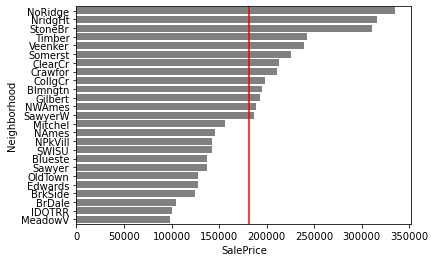

In [22]:
ax = sns.barplot(data=hood, 
            x="SalePrice",
            y="Neighborhood",
            color='grey');
#ax.axhline(hood.loc[hood["week_id"] == pd.to_datetime("2017-11-12"), "revenue"].values[0], color="r");

ax.axvline (meanp, color="red")

In [23]:
#check for outliers to remove neighborhood influence

descriptive=hood.describe().transpose()

In [24]:
#outliers neighborhood

descriptive['IQR'] = descriptive['75%'] - descriptive['25%']
print(descriptive['IQR'])

outlier25=descriptive['25%']-(1.5*descriptive['IQR'])

outlier75=descriptive['75%']+(1.5*descriptive['IQR'])

print(outlier25)
print(outlier75)

SalePrice    75772.293436
Name: IQR, dtype: float64
SalePrice    23134.694981
dtype: float64
SalePrice    326223.868726
dtype: float64


In [26]:
#removing neighborhood outliers

hood.drop(hood[(hood['SalePrice'] <= 23134.694981) | (hood['SalePrice'] >= 326223.868726)].index, inplace=True)

hood.value_counts()


Neighborhood  SalePrice    
Veenker       238772.727273    1
Timber        242247.447368    1
Blueste       137500.000000    1
BrDale        104493.750000    1
BrkSide       124834.051724    1
ClearCr       212565.428571    1
CollgCr       197965.773333    1
Crawfor       210624.725490    1
Edwards       128219.700000    1
Gilbert       192854.506329    1
IDOTRR        100123.783784    1
MeadowV       98576.470588     1
Mitchel       156270.122449    1
NAmes         145847.080000    1
NPkVill       142694.444444    1
NWAmes        189050.068493    1
NridgHt       316270.623377    1
OldTown       128225.300885    1
SWISU         142591.360000    1
Sawyer        136793.135135    1
SawyerW       186555.796610    1
Somerst       225379.837209    1
StoneBr       310499.000000    1
Blmngtn       194870.882353    1
dtype: int64

In [29]:
#check for correlations between years

house1=house.copy()



In [31]:
#check year correlation

house1 = sm.add_constant(house1)
y = house1["SalePrice"]
X = house1[["const", "time_sold_from_contruction","time_sold_from_renovation"]]

reg1 = sm.OLS(y, X).fit()

In [32]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     366.3
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.36e-129
Time:                        21:09:47   Log-Likelihood:                -18247.
No. Observations:                1460   AIC:                         3.650e+04
Df Residuals:                    1457   BIC:                         3.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.407e+05   2789.182     86.311      0.000    2.35e+05    2.46e+05
time_sold_from_contruction  -896.5619     69.778    -12.849      0.000   -1033.439    -759.685
time_sold_from_renovation  -1178.6077    102.264    -11.525      0.000   -1379.209    -978.006
==============================================================================
Omnibus:                      768.459   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7769.328
Skew:                           2.243   Prob(JB):                         0.00
Kurtosis:                      13.373   Cond. No.                         89.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#second regression

house2=house.copy()

house2 = sm.add_constant(house2)
y2 = house2["SalePrice"]
X2 = house2[["const", "time_sold_from_contruction"]]

reg2 = sm.OLS(y2, X2).fit()

reg2.summary()

#ever smaller R squared


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     550.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.86e-103
Time:                        21:18:16   Log-Likelihood:                -18310.
No. Observations:                1460   AIC:                         3.662e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.312e+05   2780.074     83.146      0.000    2.26e+05    2.37e+05
time_sold_from_contruction -1374.4151     58.607    -23.452      0.000   -1489.377   -1259.453
==============================================================================
Omnibus:                      760.828   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6820.938
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      12.575   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

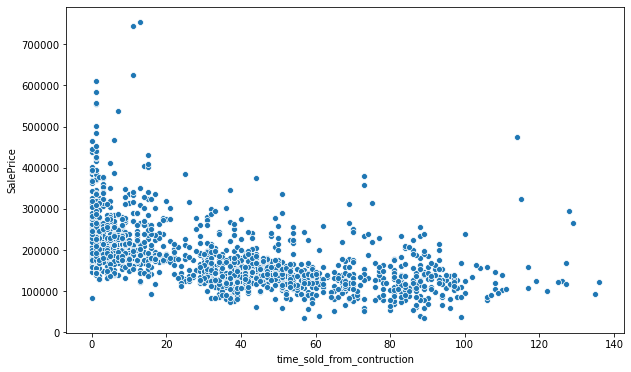

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=house2,
                x="time_sold_from_contruction",
                y="SalePrice",
                ax=ax);

In [40]:
#second regression

house3=house.copy()

house3 = sm.add_constant(house3)
y3 = house3["SalePrice"]
X3 = house3[["const", "YearBuilt"]]

reg3 = sm.OLS(y3, X3).fit()

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          2.99e-103
Time:                        21:19:02   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.000   -2.76e+06    -2.3e+06
YearBuilt   1375.3735     58.717     23.424      0.000    1260.194    1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#quadratic possible?

#check

#ax^2 + bx + c



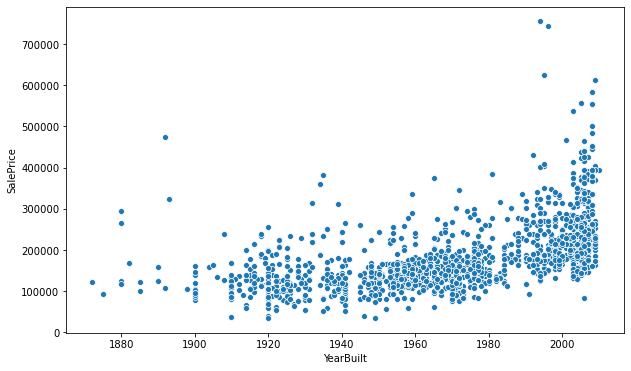

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=house3,
                x="YearBuilt",
                y="SalePrice",
                ax=ax);

In [ ]:
#year per se doesnt seem to really explain the house price

In [42]:
house3.head()

,const,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation,total_bathrooms_above_gl
0,1.0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,...,548,0,0,2,2008,Normal,208500,5,5,3
1,1.0,2,9600,Pave,Veenker,1Story,6,8,1976,1976,...,460,0,0,5,2007,Normal,181500,31,31,2
2,1.0,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,...,608,0,0,9,2008,Normal,223500,7,6,3
3,1.0,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,...,642,0,0,2,2006,Abnorml,140000,91,36,1
4,1.0,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,...,836,0,0,12,2008,Normal,250000,8,8,3


In [43]:
house3.columns

Index(['const', 'Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'time_sold_from_contruction', 'time_sold_from_renovation',
       'total_bathrooms_above_gl'],
      dtype='object')

In [49]:
#area regressions

house4=house.copy()

house4 = sm.add_constant(house4)
y4 = house4["SalePrice"]
X4 = house4[["const", "LotArea","GrLivArea"]]

# garage area and pool area seemed irrelevant

reg4 = sm.OLS(y4, X4).fit()

reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     754.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.66e-225
Time:                        21:29:03   Log-Likelihood:                -18025.
No. Observations:                1460   AIC:                         3.606e+04
Df Residuals:                    1457   BIC:                         3.607e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.662e+04   4475.495      3.714      0.000    7842.330    2.54e+04
LotArea        0.6618      0.152      4.368      0.000       0.365       0.959
GrLivArea    103.8228      2.878     36.076      0.000      98.178     109.468
==============================================================================
Omnibus:                      268.272   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4299.016
Skew:                           0.351   Prob(JB):                         0.00
Kurtosis:                      11.377   Cond. No.                     4.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# condition regressions

house5=house.copy()

house5 = sm.add_constant(house5)
y5 = house5["SalePrice"]
X5 = house5[["const", "OverallCond"]]

reg5 = sm.OLS(y5, X5).fit()

reg5.summary()

#not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.892
Date:                Thu, 10 Sep 2020   Prob (F-statistic):            0.00291
Time:                        21:31:47   Log-Likelihood:                -18540.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1458   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.119e+05   1.06e+04     19.997      0.000    1.91e+05    2.33e+05
OverallCond -5558.1154   1863.962     -2.982      0.003   -9214.449   -1901.782
==============================================================================
Omnibus:                      601.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3406.241
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                       9.512   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
house6=house.copy()

house6 = sm.add_constant(house6)
y6 = house6["SalePrice"]
X6 = house6[["const", "OverallQual"]]

reg6 = sm.OLS(y6, X6).fit()

reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          2.19e-313
Time:                        21:34:19   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#last model close to acceptable R, potential! trying now without neighborhood outliers

house7=house.copy()
house7.drop(house7[(house7['SalePrice'] <= 23134.694981) | (house7['SalePrice'] >= 326223.868726)].index, inplace=True)


house7 = sm.add_constant(house7)
y7 = house7["SalePrice"]
X7 = house7[["const", "OverallQual"]]

reg7 = sm.OLS(y7, X7).fit()

reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2167.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.61e-285
Time:                        21:44:59   Log-Likelihood:                -16514.
No. Observations:                1387   AIC:                         3.303e+04
Df Residuals:                    1385   BIC:                         3.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.212e+04   4632.723     -9.093      0.000   -5.12e+04    -3.3e+04
OverallQual  3.536e+04    759.708     46.549      0.000    3.39e+04    3.69e+04
==============================================================================
Omnibus:                       23.316   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.166
Skew:                           0.146   Prob(JB):                     1.40e-08
Kurtosis:                       3.735   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#removing outliers didn´t improve the model

In [59]:
house.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation,total_bathrooms_above_gl
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,548,0,0,2,2008,Normal,208500,5,5,3
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,460,0,0,5,2007,Normal,181500,31,31,2
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,608,0,0,9,2008,Normal,223500,7,6,3
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,642,0,0,2,2006,Abnorml,140000,91,36,1
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,836,0,0,12,2008,Normal,250000,8,8,3


In [63]:
house7.columns

Index(['const', 'Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'time_sold_from_contruction', 'time_sold_from_renovation',
       'total_bathrooms_above_gl'],
      dtype='object')

In [65]:

house8=house.copy()

house8 = sm.add_constant(house8)
y8 = house8["SalePrice"]
X8 = house8[["const", "TotRmsAbvGrd","total_bathrooms_above_gl"]]

reg8 = sm.OLS(y8, X8).fit()

reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     447.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          2.87e-152
Time:                        21:50:16   Log-Likelihood:                -18194.
No. Observations:                1460   AIC:                         3.639e+04
Df Residuals:                    1457   BIC:                         3.641e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     9742.2590   6769.812      1.439      0.150   -3537.360     2.3e+04
TotRmsAbvGrd              1.469e+04   1261.719     11.646      0.000    1.22e+04    1.72e+04
total_bathrooms_above_gl  3.871e+04   2579.723     15.006      0.000    3.37e+04    4.38e+04
==============================================================================
Omnibus:                      513.471   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2679.194
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                       8.856   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""